In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# DX in fin clips vs muscle

## Blank Correction & Lipid Nomalization

In [2]:
tagToId = pd.read_excel('muslce,fin clips dioxcin,furans.xlsx')
finclip = pd.read_excel('muslce,fin clips dioxcin,furans.xlsx', sheet_name= 'Fin clips')
rl_nd = finclip.loc[finclip.iloc[:, -6] == "ND", finclip.columns[-4]].dropna()

finclip.loc[rl_nd.index, finclip.columns[-5]] = rl_nd.to_numpy('float32')/np.sqrt(2)

c = finclip.columns
c = c[~c.str.contains('Unnamed')]
finclip = finclip.iloc[5:, [0]].join(finclip.iloc[5:, 2::3])
finclip.columns = c.astype('str')
id_to_name_dict = dict(zip(tagToId['Tag name'], tagToId['Fish ID']))
id_to_name_dict.update({"13-Trembleur":"13"})
finclip.rename(columns=id_to_name_dict, inplace=True)
finclip.insert(1, 'tag', 'finclip')
finclip.columns = finclip.columns.map(lambda x: str(x))
lipid_id = finclip.iloc[:, 0].str.contains('lipid', case=False)
id = finclip.loc[~lipid_id, finclip.columns[-2]].dropna().index
finclip.loc[id, finclip.columns[2:-2]] -= finclip.loc[id, finclip.columns[-2]].to_numpy('float')[:, np.newaxis]
finclip = finclip.iloc[:, :-2]
print(f'count of samples corrected to negative: {np.sum((~(finclip.iloc[:, 2:].isna() | (finclip.iloc[:, 2:] > 0)).to_numpy()))}')
print(f'position of corrected samples: {np.where((~(finclip.iloc[:, 2:].isna() | (finclip.iloc[:, 2:] > 0))).to_numpy())}')
finclip.where((finclip.iloc[:, 2:]>0) | (finclip.iloc[:, 2:].isna()), 0, inplace = True)
finclip

finclip_l = finclip.copy()

lipid_id = np.arange(len(finclip_l.CLIENT_ID))[finclip_l.CLIENT_ID.str.contains('Lipid', case = False)][0]
finclip_l.iloc[lipid_id, 2:] /= 100
id = list(range(finclip_l.shape[0]))
id.pop(lipid_id)
finclip_l.iloc[id, 2:] /= finclip_l.iloc[lipid_id, 2:]
finclip_l

count of samples corrected to negative: 82
position of corrected samples: (array([ 7,  7, 18, 18, 18, 18, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30, 30,
       30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 33, 34,
       34, 35, 35, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 38, 38, 38, 38,
       38, 38, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 40, 41, 41,
       42, 42, 42, 42, 42, 42, 42, 42, 43, 43, 44, 45, 45, 45]), array([0, 2, 0, 4, 6, 7, 0, 5, 0, 3, 5, 7, 8, 0, 1, 3, 5, 6, 7, 8, 0, 1,
       3, 4, 5, 6, 7, 8, 0, 5, 6, 8, 6, 0, 5, 0, 5, 0, 3, 5, 7, 8, 0, 3,
       5, 7, 8, 0, 3, 5, 6, 7, 8, 0, 3, 5, 6, 7, 8, 0, 1, 3, 5, 6, 7, 8,
       5, 8, 0, 1, 2, 3, 5, 6, 7, 8, 0, 5, 6, 0, 4, 6]))


,CLIENT_ID,tag,1,2,3,4,5,7,10,11,13
5,"2,3,7,8-TCDD",finclip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"1,2,3,7,8-PECDD",finclip,NaN,NaN,NaN,77.90976,NaN,NaN,NaN,NaN,NaN
7,"1,2,3,4,7,8-HXCDD",finclip,NaN,NaN,NaN,66.725549,NaN,NaN,NaN,NaN,NaN
8,"1,2,3,6,7,8-HXCDD",finclip,NaN,NaN,NaN,40.475549,NaN,NaN,NaN,NaN,NaN
9,"1,2,3,7,8,9-HXCDD (225)",finclip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,"1,2,3,7,8,9-HXCDD",finclip,NaN,NaN,NaN,126.593971,NaN,NaN,NaN,NaN,NaN
11,"1,2,3,4,6,7,8-HPCDD",finclip,3.008339,27.065229,NaN,148.304497,19.420116,36.39872,NaN,44.037181,76.477339
12,OCDD,finclip,0.0,81.481481,0.0,419.078947,79.802956,76.923077,NaN,65.088757,57.926829
13,"2,3,7,8-TCDF (225)",finclip,78.235294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,"2,3,7,8-TCDF",finclip,21.831868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
muscle = pd.read_excel('muslce,fin clips dioxcin,furans.xlsx', sheet_name= 'Muslce')
rl_nd = muscle.loc[muscle.iloc[:, -6] == "ND", muscle.columns[-4]].dropna()
muscle.loc[rl_nd.index, muscle.columns[-5]] = rl_nd.to_numpy('float32')/np.sqrt(2)

c = muscle.columns
c = c[~c.str.contains('Unnamed')]
muscle = muscle.iloc[5:, [0]].join(muscle.iloc[5:, 2::3])
c = list(c.str.removeprefix("Nechako mort #"))
muscle.columns = c
muscle.insert(1, 'tag', 'muscle')

lipid_id = muscle.iloc[:, 0].str.contains('lipid', case=False)
id = muscle.loc[~lipid_id, muscle.columns[-2]].dropna().index
muscle.loc[id, muscle.columns[2:-2]] -= muscle.loc[id, muscle.columns[-2]].to_numpy('float')[:, np.newaxis]
muscle = muscle.iloc[:, :-2]
print(f'count of samples corrected to negative: {np.sum((~(muscle.iloc[:, 2:].isna() | (muscle.iloc[:, 2:] > 0)).to_numpy()))}')
print(f'position of corrected samples: {np.where((~(muscle.iloc[:, 2:].isna() | (muscle.iloc[:, 2:] > 0))).to_numpy())}')
muscle.where((muscle.iloc[:, 2:]>0) | (muscle.iloc[:, 2:].isna()), 0, inplace = True)


muscle_l = muscle.copy()

lipid_id = np.arange(len(muscle_l.CLIENT_ID))[muscle_l.CLIENT_ID.str.contains('Lipid', case = False)][0]
muscle_l.iloc[lipid_id, 2:] /= 100
id = list(range(muscle_l.shape[0]))
id.pop(lipid_id)
muscle_l.iloc[id, 2:] /= muscle_l.iloc[lipid_id, 2:]
muscle_l

blankcorrect_table = pd.concat([finclip, muscle], axis = 0)

blankcorrect_table['CLIENT_ID'] = blankcorrect_table["CLIENT_ID"].astype("category")
blankcorrect_table['CLIENT_ID'] = blankcorrect_table['CLIENT_ID'].cat.set_categories(finclip['CLIENT_ID'])
blankcorrect_table.sort_values(['CLIENT_ID'], inplace = True)
blankcorrect_table.reset_index(drop=True, inplace=True)
blankcorrect_table

count of samples corrected to negative: 48
position of corrected samples: (array([ 7, 28, 28, 29, 29, 29, 29, 30, 30, 30, 31, 31, 32, 32, 32, 32, 33,
       33, 33, 33, 34, 34, 35, 35, 35, 35, 36, 36, 36, 37, 37, 38, 38, 39,
       39, 39, 40, 40, 40, 41, 41, 41, 42, 42, 42, 43, 43, 44]), array([3, 0, 2, 0, 1, 2, 3, 0, 2, 3, 0, 2, 0, 1, 2, 3, 0, 1, 2, 3, 0, 2,
       0, 1, 2, 3, 0, 2, 3, 0, 2, 0, 2, 0, 2, 3, 0, 2, 3, 0, 2, 3, 0, 2,
       3, 0, 2, 3]))


,CLIENT_ID,tag,1,2,3,4,5,7,10,11,13
0,"2,3,7,8-TCDD",finclip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"2,3,7,8-TCDD",muscle,NaN,0.067988,NaN,NaN,NaN,0.050988,NaN,NaN,NaN
2,"1,2,3,7,8-PECDD",muscle,NaN,0.075988,NaN,NaN,NaN,0.042988,NaN,NaN,NaN
3,"1,2,3,7,8-PECDD",finclip,NaN,NaN,NaN,1.184228,NaN,NaN,NaN,NaN,NaN
4,"1,2,3,4,7,8-HXCDD",finclip,NaN,NaN,NaN,1.014228,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
87,"37CL-2,3,7,8-TCDD (% Recovery)",finclip,0,20.4,20.1,8.5,9.9,0,15.9,11.4,18.5
88,WHO 2005 TOTAL (TEQ ND=0),muscle,NaN,0.462,NaN,0.063,NaN,0.602,0,NaN,NaN
89,WHO 2005 TOTAL (TEQ ND=0),finclip,0.0295,0.00558,0.000239,1.98,0.00775,0.00023,0,0.000893,0.0153
90,WHO 2005 TOTAL (TEQ ND=1/2 DL),finclip,0,0.139,0.162,1.984,0,0.249,0,0.053,1.664


### lipid nomalized

In [4]:
lipid_table = pd.concat([finclip_l, muscle_l], axis = 0)
lipid_table.sort_values(['CLIENT_ID'], inplace = True)
lipid_table.reset_index(drop=True, inplace=True)
lipid_table.drop(index=[0, 1], inplace=True)
lipid_table.drop(index = lipid_table.index[lipid_table.CLIENT_ID.str.contains('WHO', case = False)], inplace=True)
lipid_table.drop(index = lipid_table.index[lipid_table.CLIENT_ID.str.contains('Total', case = False)], inplace=True)
lipid_table.drop(index = lipid_table.index[lipid_table.CLIENT_ID.str.contains('recovery', case = False)], inplace=True)
lipid_table.head()

,CLIENT_ID,tag,1,2,3,4,5,7,10,11,13
2,"1,2,3,4,6,7,8-HPCDD",muscle,NaN,2.321982,NaN,1.087142,NaN,0.453695,NaN,NaN,NaN
3,"1,2,3,4,6,7,8-HPCDD",finclip,3.008339,27.065229,NaN,148.304497,19.420116,36.39872,NaN,44.037181,76.477339
4,"1,2,3,4,6,7,8-HPCDF",muscle,NaN,0.749948,NaN,0.71821,NaN,0.259665,NaN,NaN,NaN
5,"1,2,3,4,6,7,8-HPCDF",finclip,60.36128,54.102266,NaN,123.304497,NaN,NaN,NaN,NaN,NaN
6,"1,2,3,4,7,8,9-HPCDF",finclip,NaN,NaN,NaN,154.225549,NaN,NaN,NaN,NaN,NaN


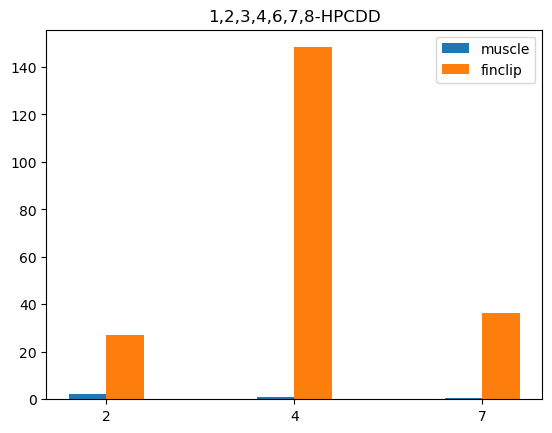

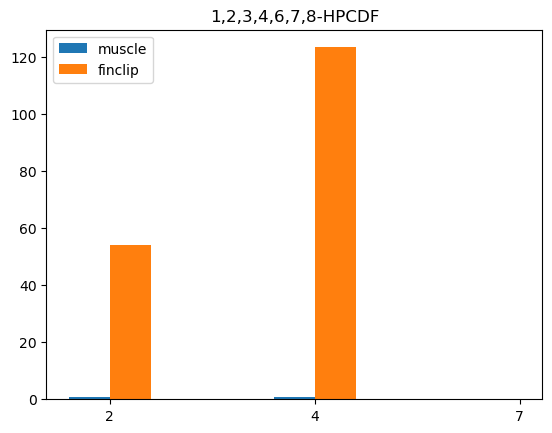

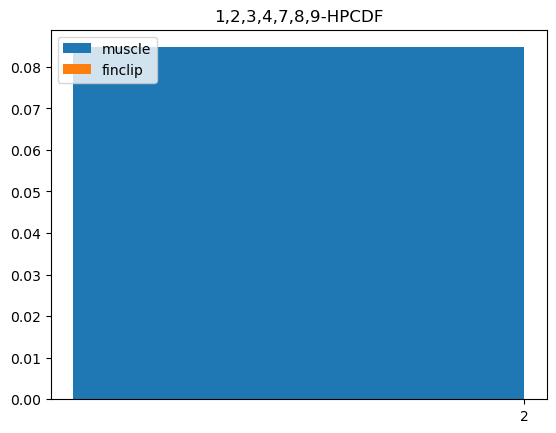

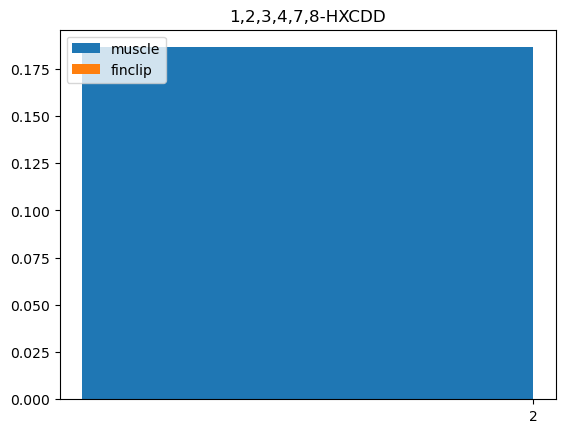

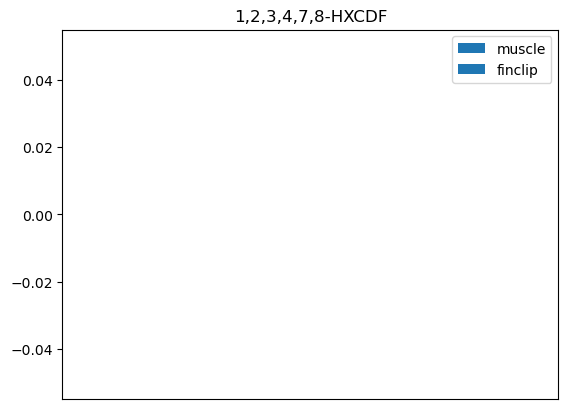

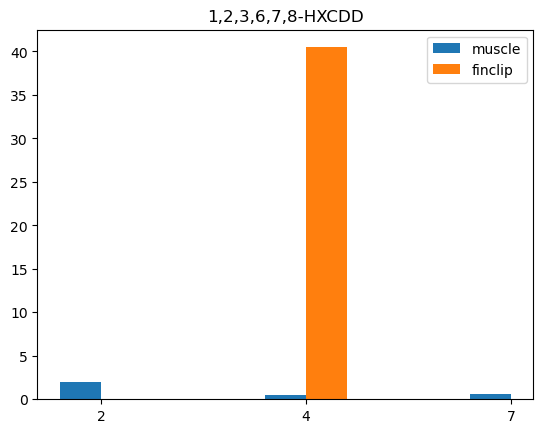

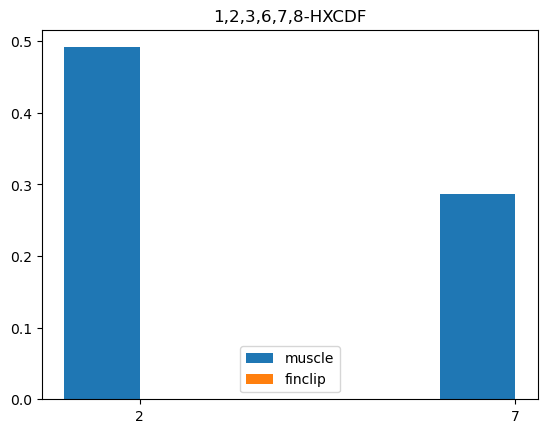

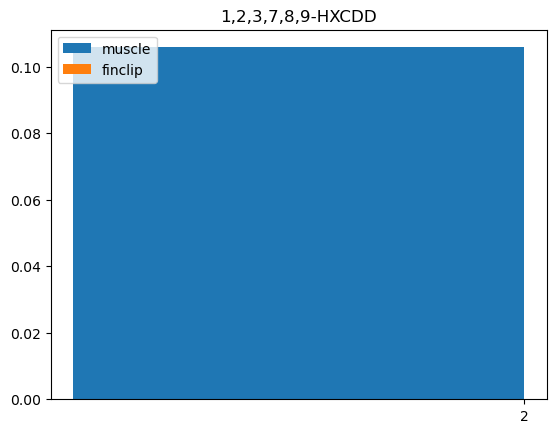

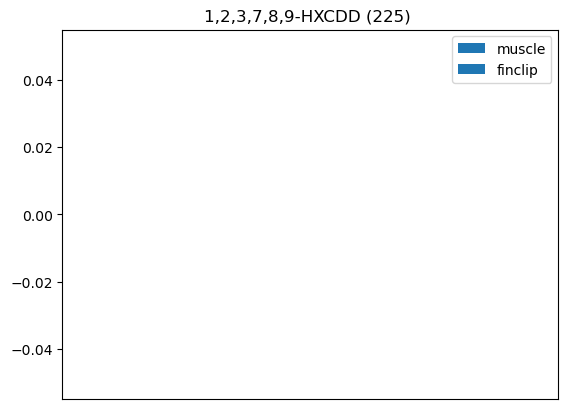

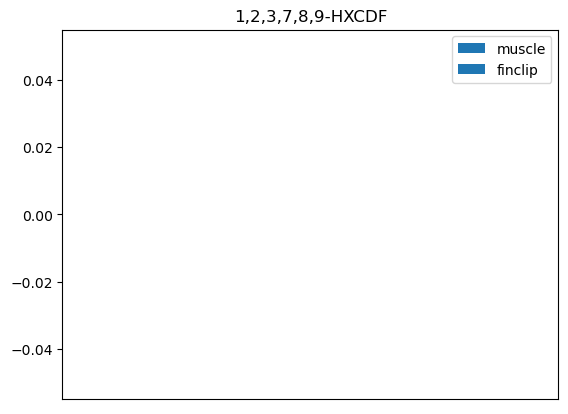

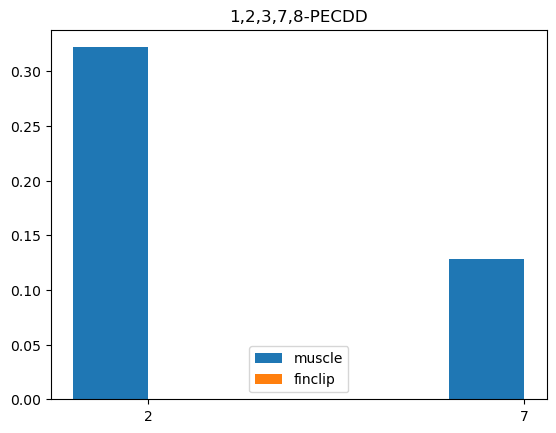

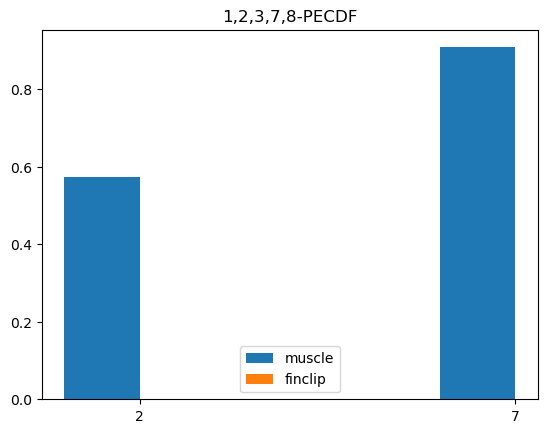

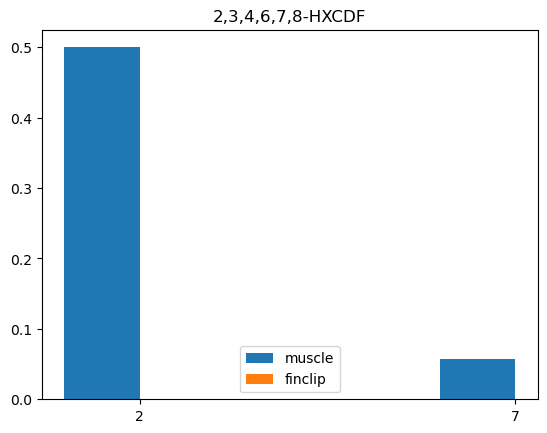

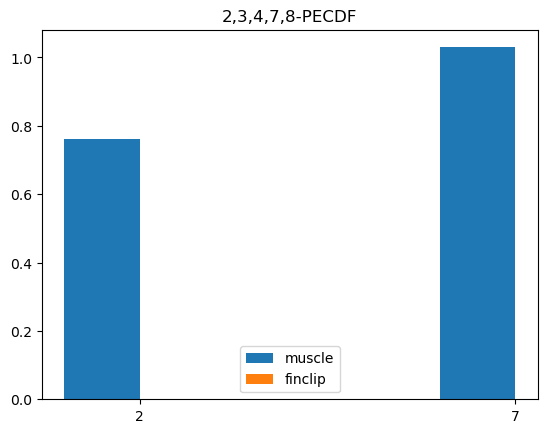

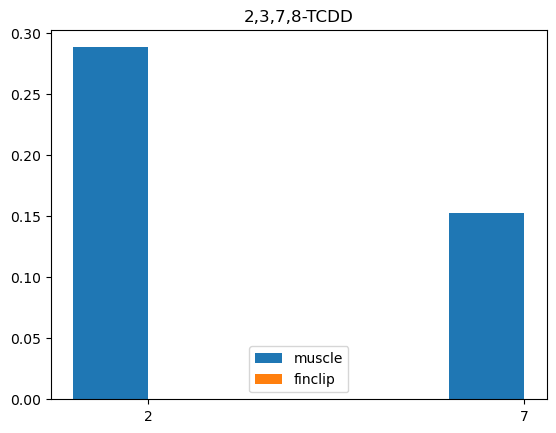

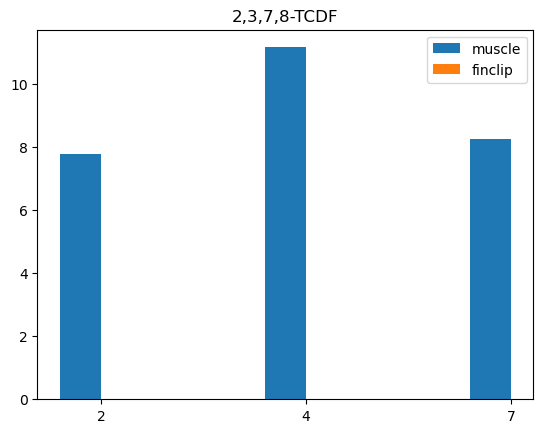

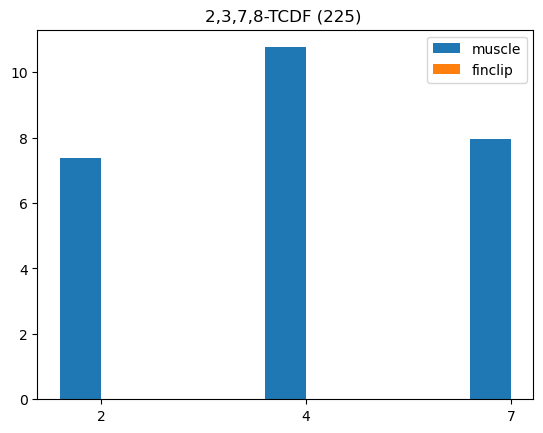

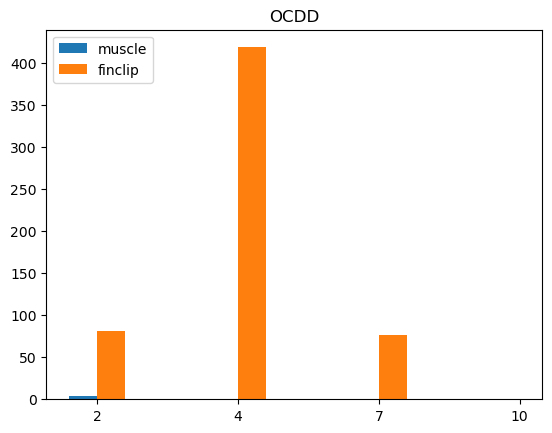

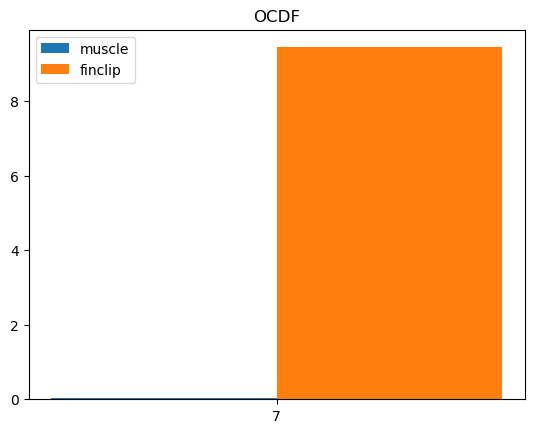

In [37]:
t= lipid_table
width = 0.2
for r in t["CLIENT_ID"].unique():
    plt.figure(facecolor='white')
    temp = t.loc[(t.CLIENT_ID == r) & (t.tag == "muscle"), t.columns[2:]].dropna(axis=1)
    x = np.arange(len(temp.columns)) - (width/2)
    plt.xticks(np.arange(len(temp.columns)), temp.columns)
    y = temp.to_numpy("float")[0]

    plt.bar(x,y, width=width, label = "muscle")


    temp = t.loc[(t.CLIENT_ID == r) & (t.tag == "finclip"), temp.columns]
    
    y = temp.to_numpy("float")[0]
    
    plt.bar(x + width,y, width=width, label = "finclip")
    plt.title(f'{r}')
    plt.legend()
    


/var/folders/v1/cgxs0rj57wgfdxxy2t8h47700000gn/T/ipykernel_25766/2196909449.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(facecolor='white')


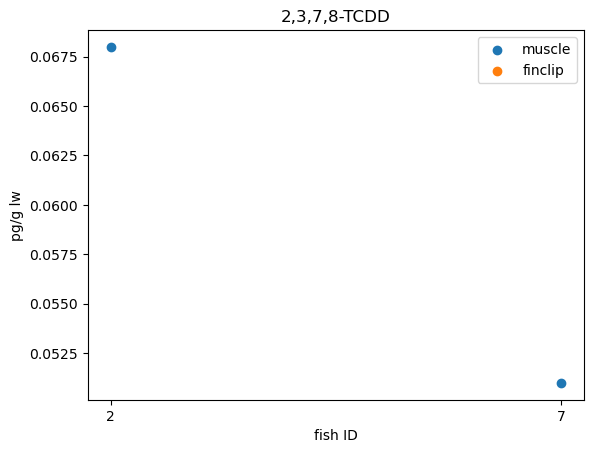

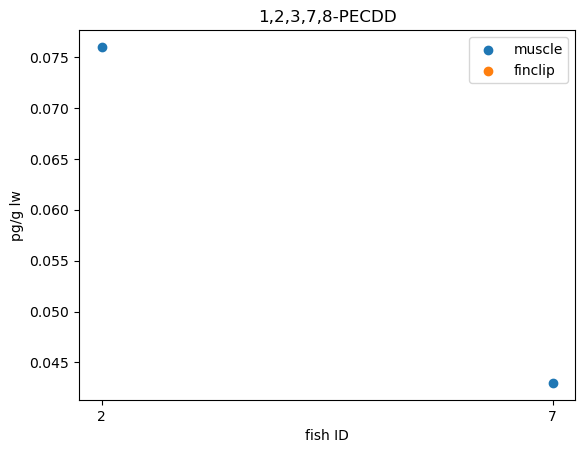

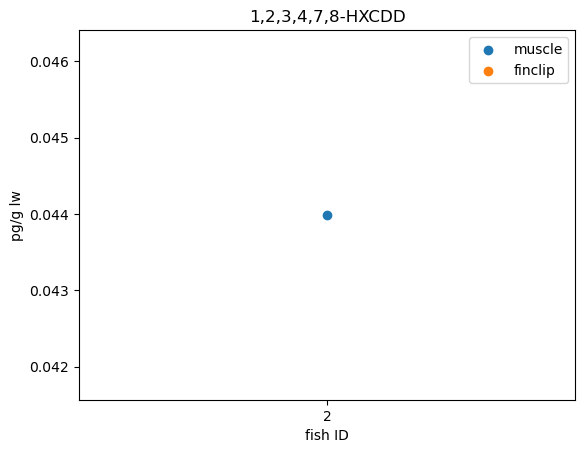

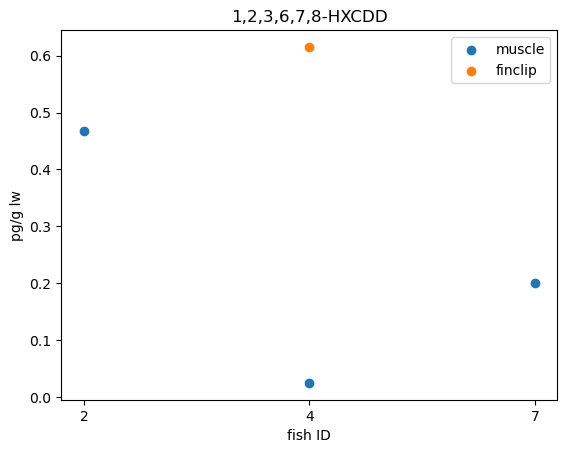

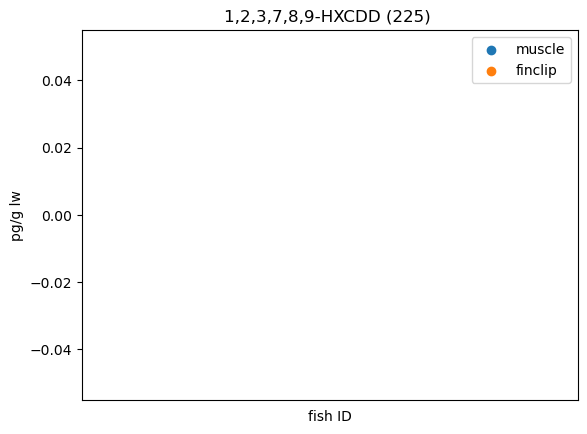

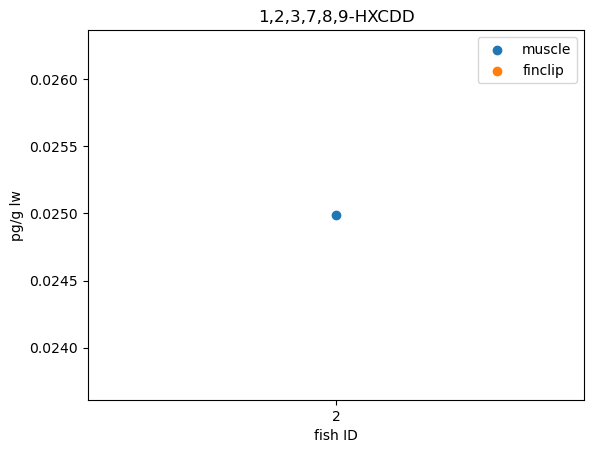

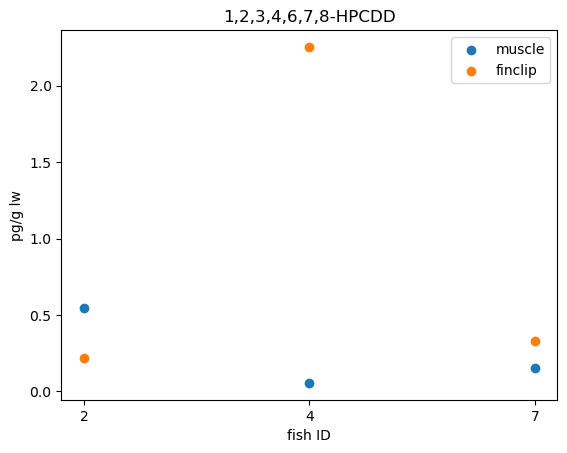

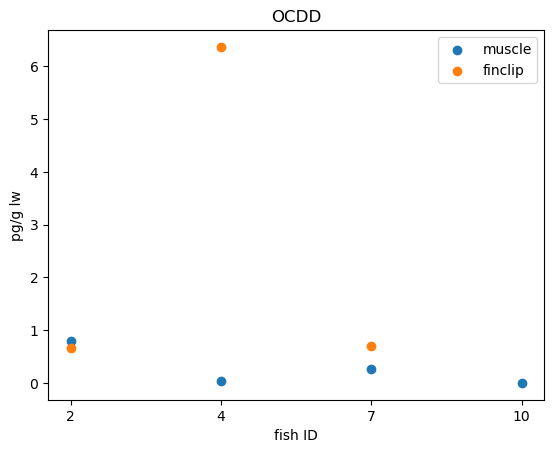

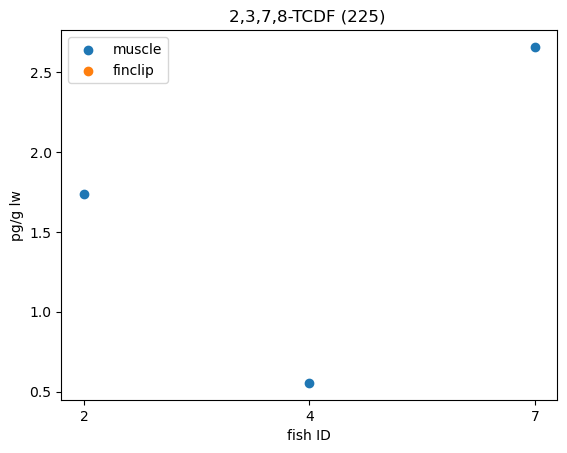

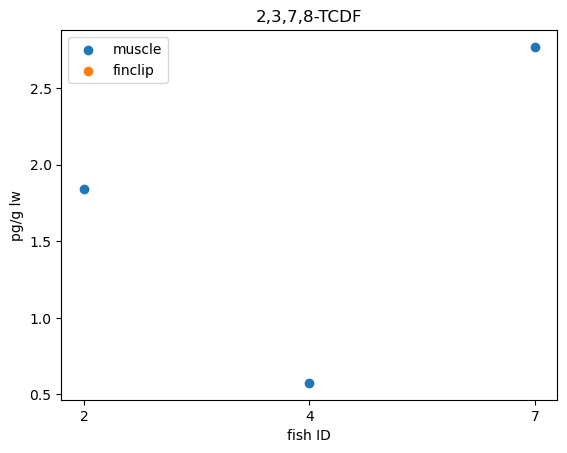

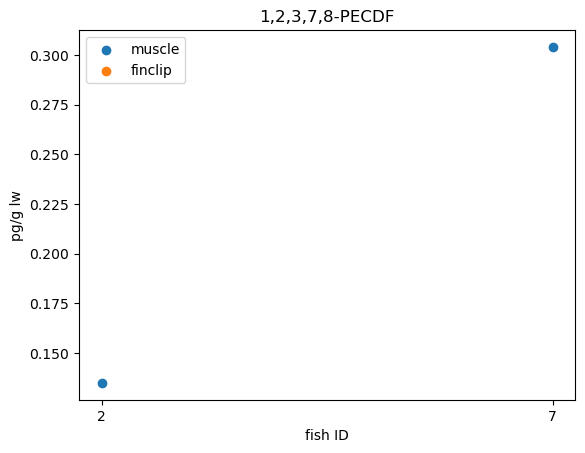

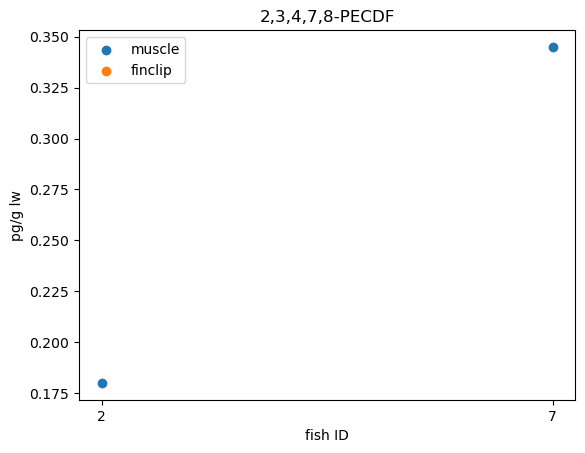

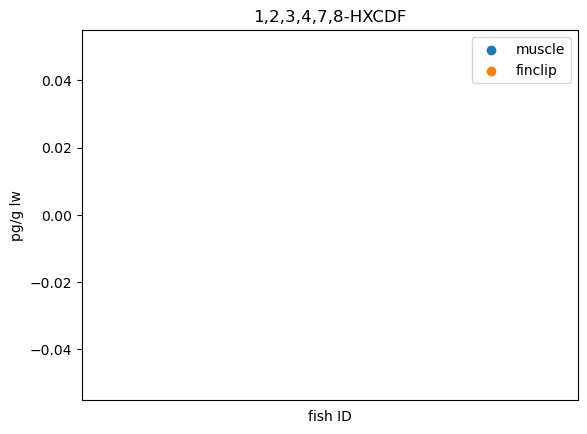

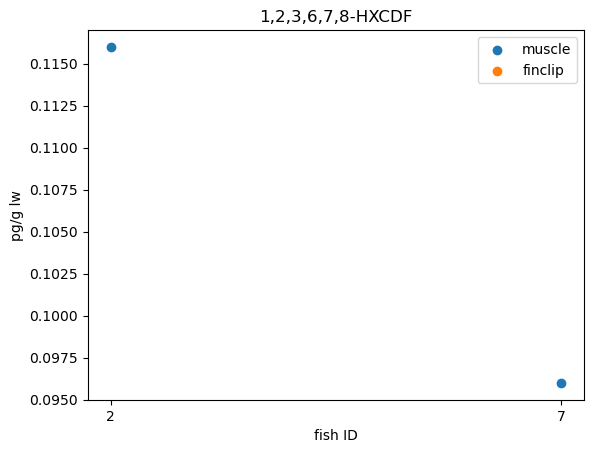

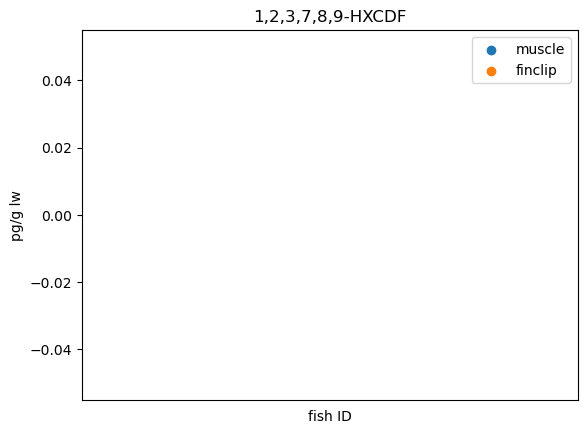

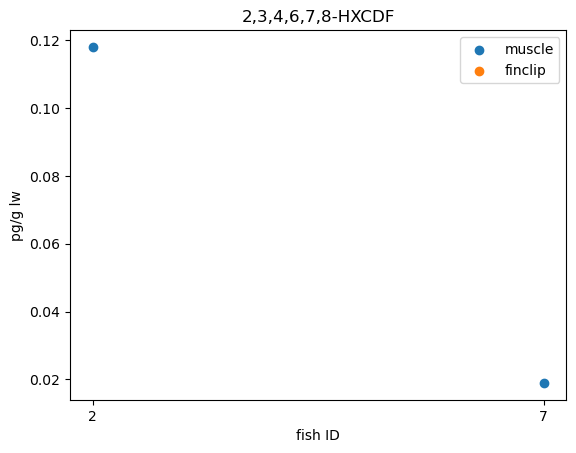

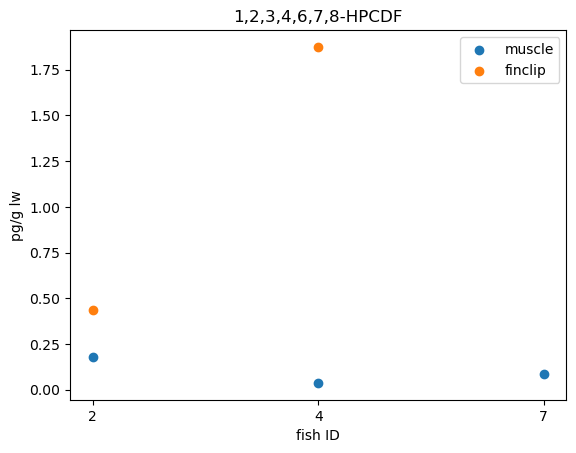

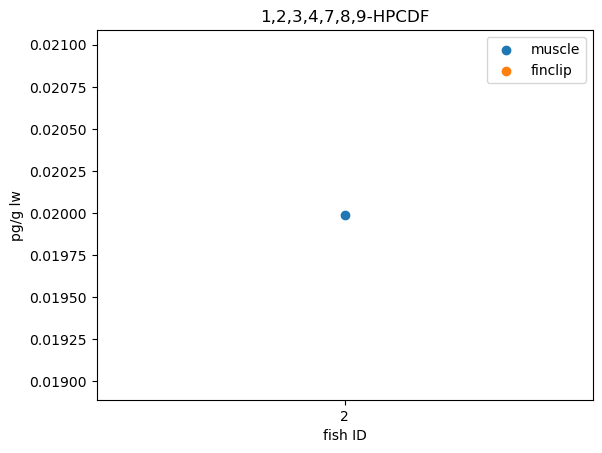

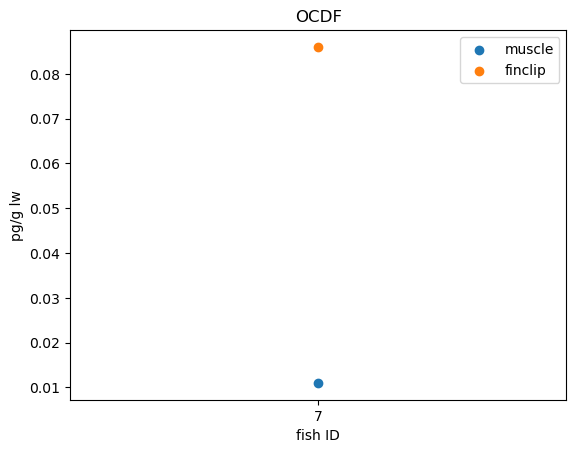

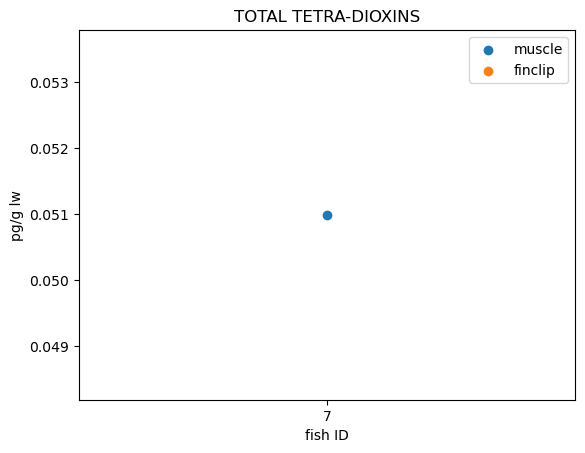

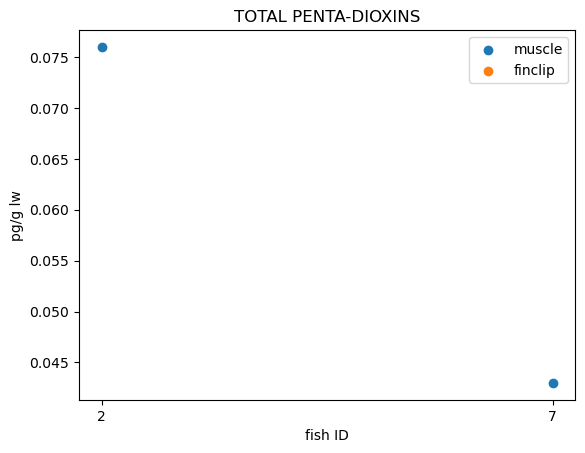

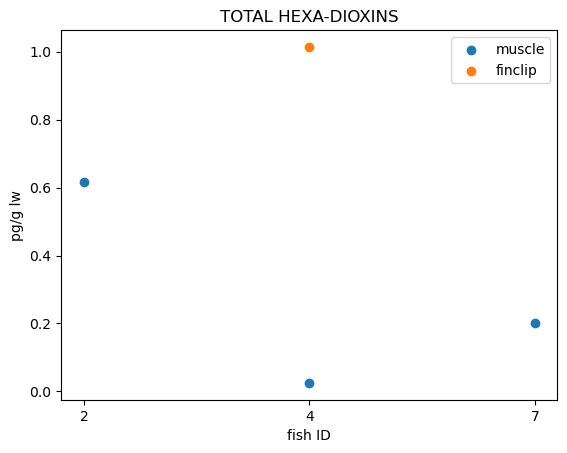

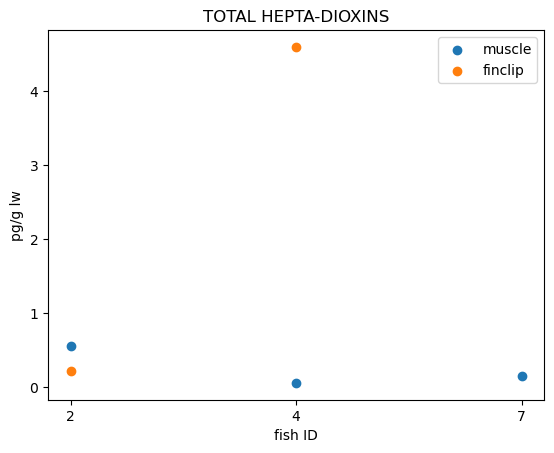

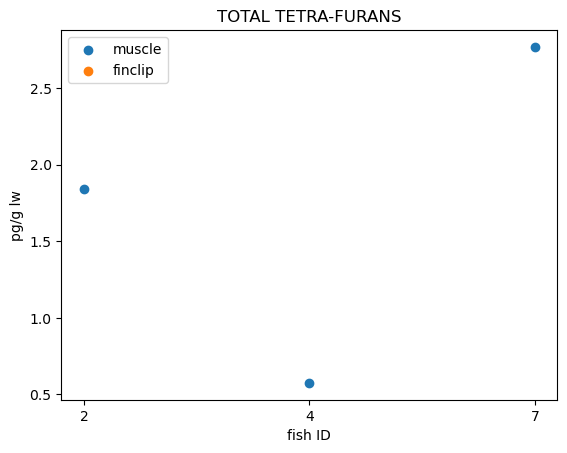

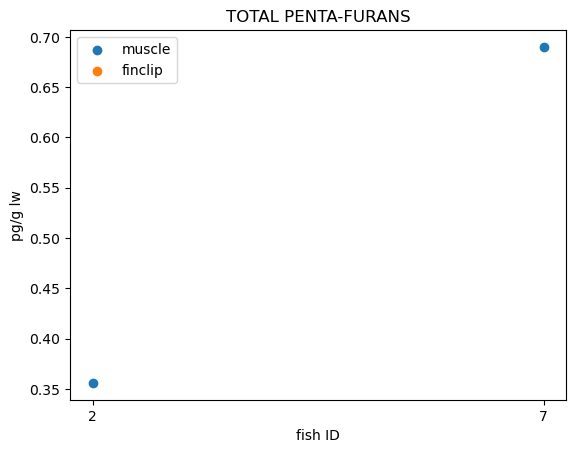

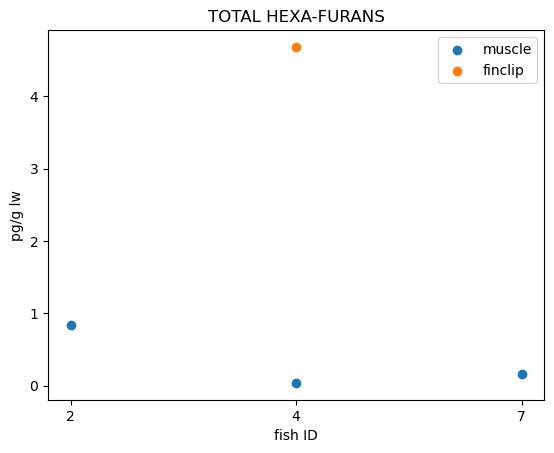

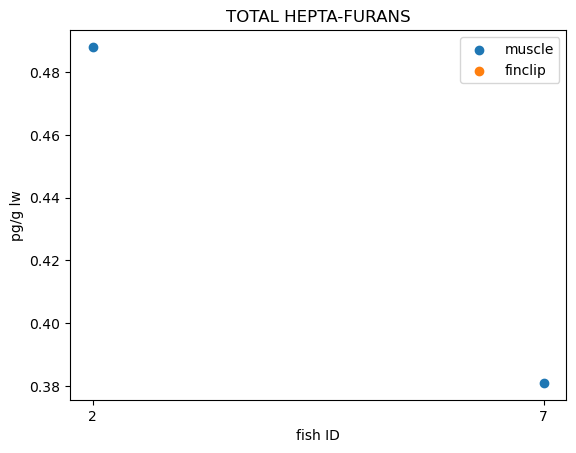

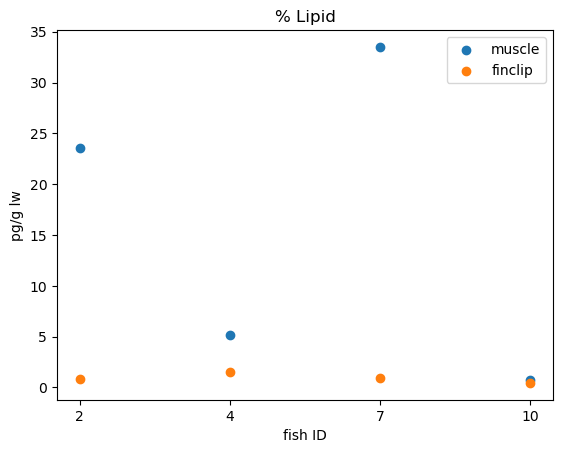

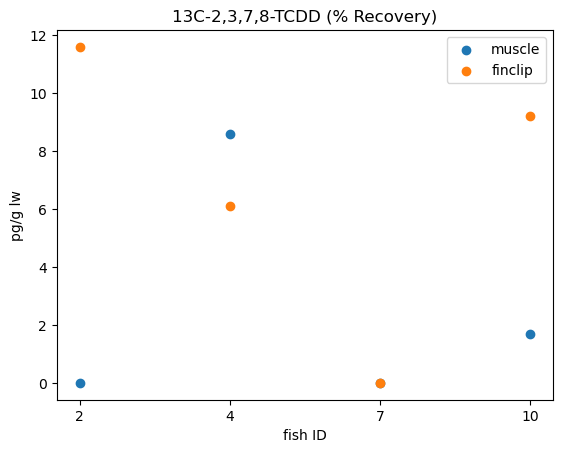

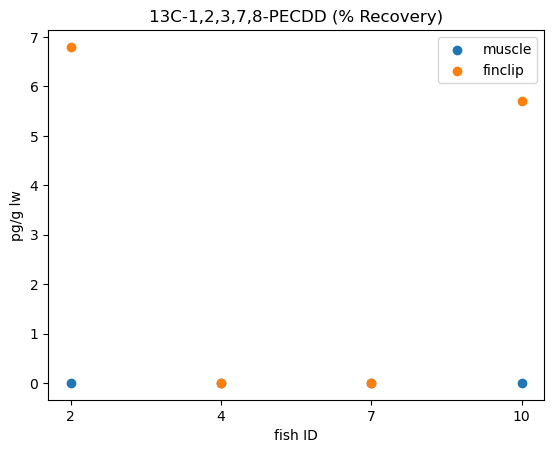

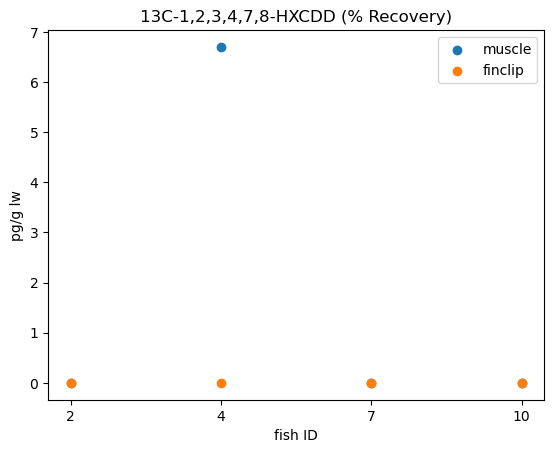

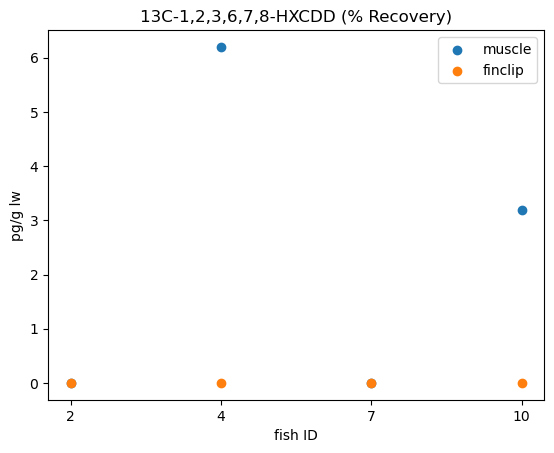

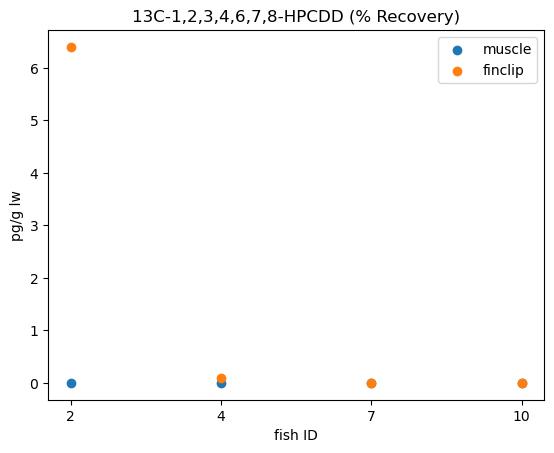

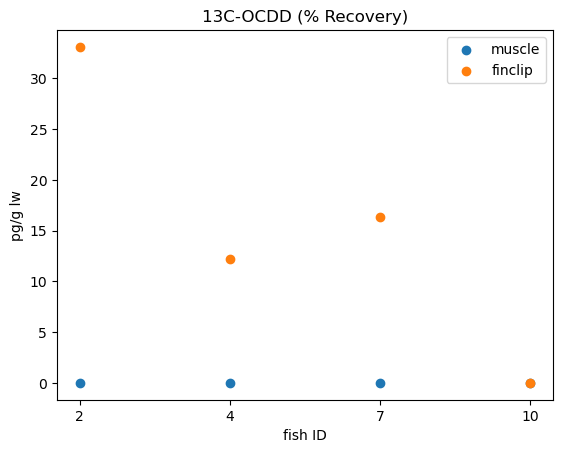

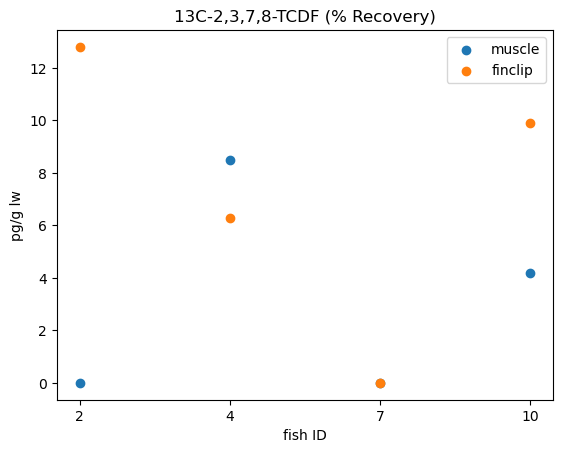

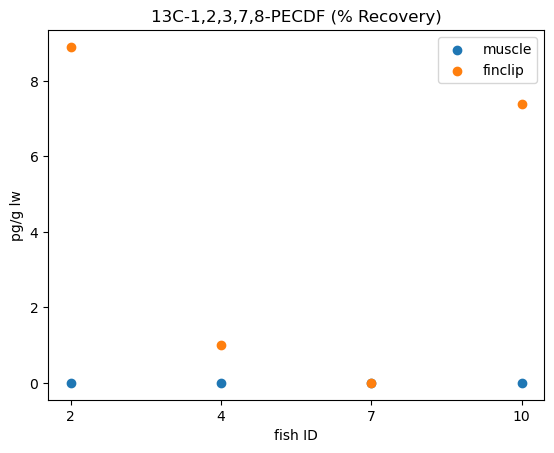

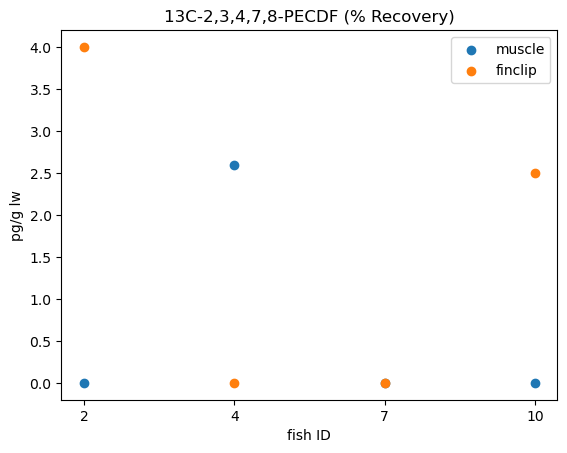

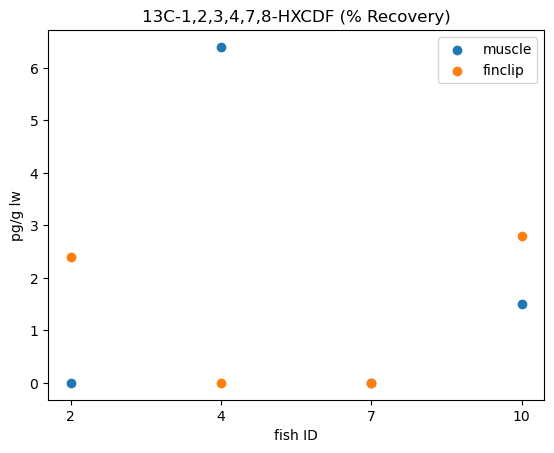

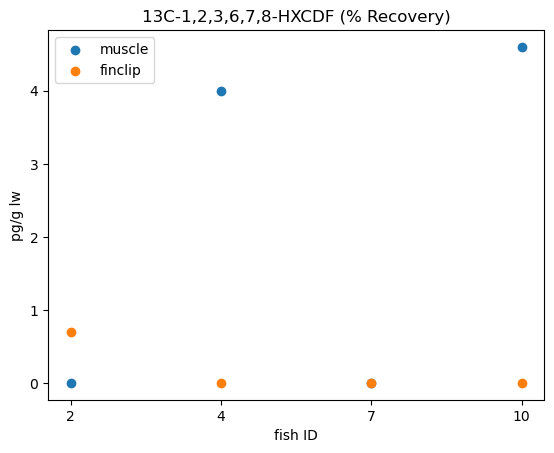

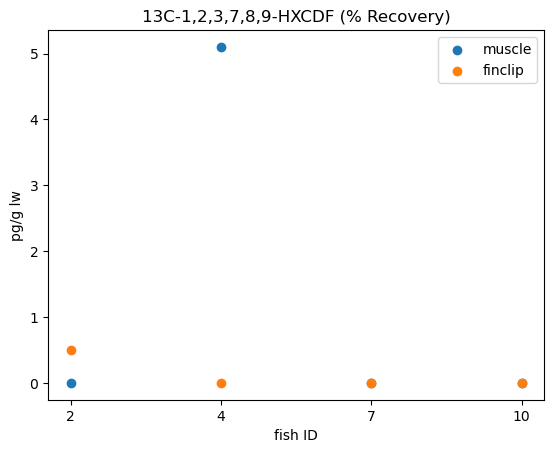

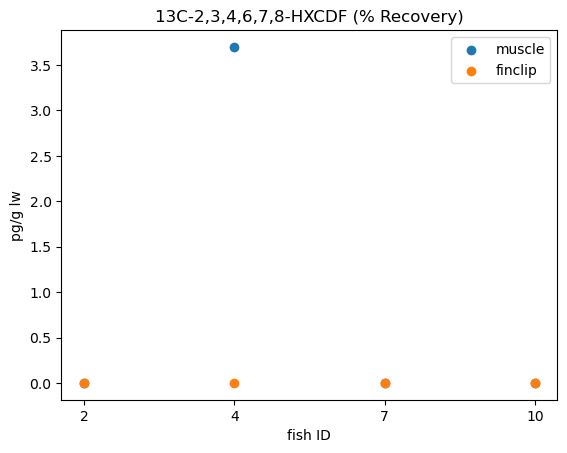

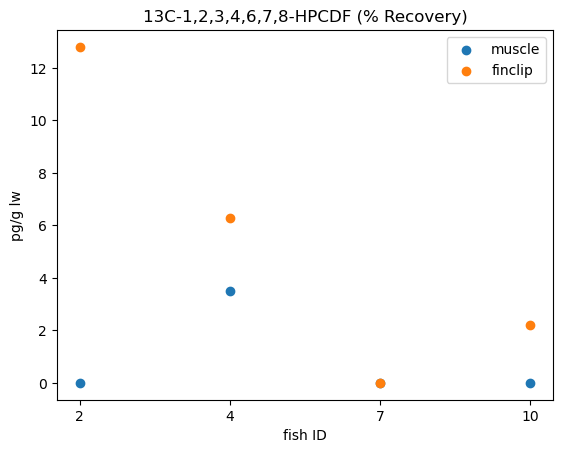

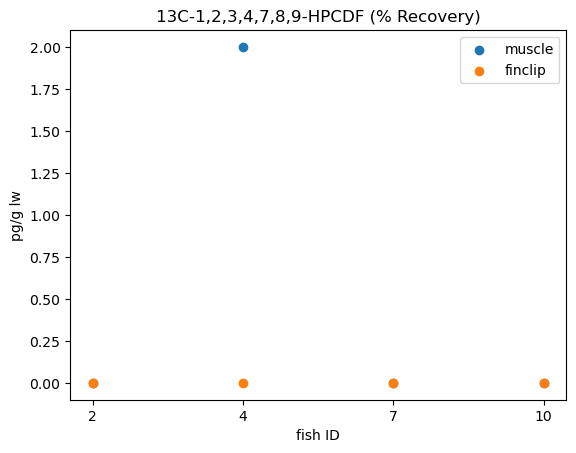

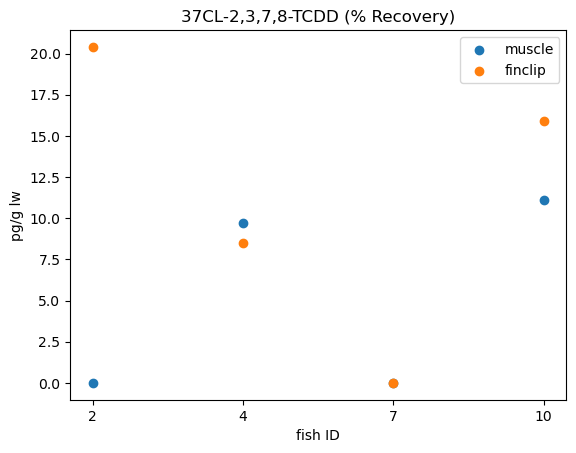

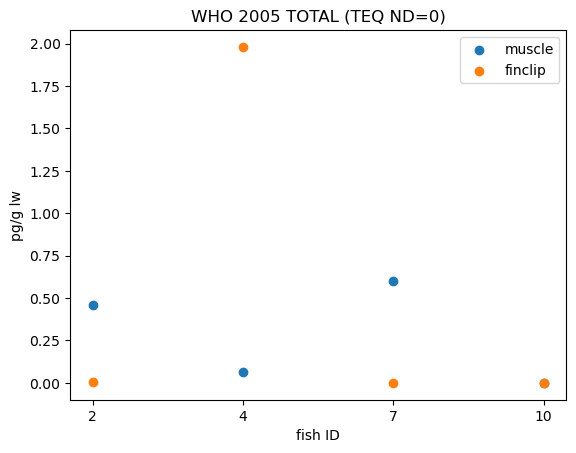

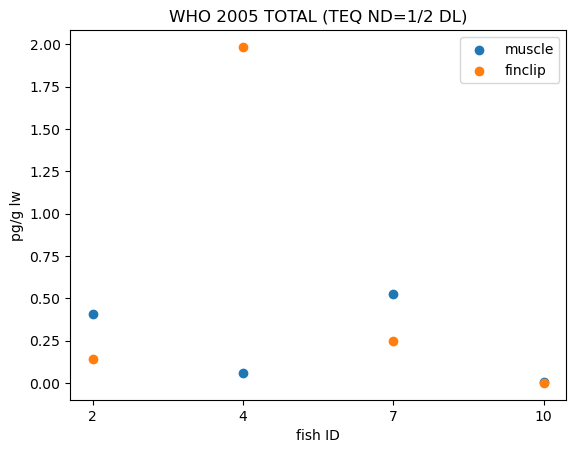

In [34]:
t= blankcorrect_table

for r in t["CLIENT_ID"].unique():
    plt.figure(facecolor='white')
    temp = t.loc[(t.CLIENT_ID == r) & (t.tag == "muscle"), t.columns[2:]].dropna(axis=1)
    x = np.arange(len(temp.columns)) 
    plt.xticks(np.arange(len(temp.columns)), temp.columns)
    y = temp.to_numpy("float")[0]
    plt.xlabel("fish ID")
    plt.ylabel("pg/g lw")
    plt.scatter(x,y, label = "muscle")
    

    temp = t.loc[(t.CLIENT_ID == r) & (t.tag == "finclip"), temp.columns]
    
    y = temp.to_numpy("float")[0]
    
    plt.scatter(x,y, label = "finclip")
    plt.title(f'{r}')
    plt.legend()

In [35]:
t= blankcorrect_table
t = t.loc[:, t.sum(axis=0) != 0]
t = t.loc[:, t.loc[t.tag == 'muscle', :].sum(axis=0) != 0] # for removing the rest (without muscle)

x = np.arange(len(t.columns[2:]))*2
width = 0.8
bottom1 = 0 #muslce
bottom2 = 0 #finclip

plt.figure(facecolor='white', figsize=(10, 10))
plt.xticks(np.r_[x+(width/2), x-(width/2)], np.r_[t.columns[2:]+"-finclip", t.columns[2:]+"-muscle"], rotation = 60, ha = 'right', fontsize = 20)
cmap = plt.get_cmap('Spectral')
z_c = len(t['CLIENT_ID'].unique())
for i, r in enumerate(t["CLIENT_ID"].unique()):
    color = cmap(i/z_c)
    temp = t.loc[(t.CLIENT_ID == r) & (t.tag == "muscle"), t.columns[2:]]
    y = temp.to_numpy("float")[0]#/1000000
    plt.bar(x - (width/2),y, width=width, color = color, bottom = bottom1)
    y[np.isnan(y)] = 0
    bottom1 = y + bottom1

    temp = t.loc[(t.CLIENT_ID == r) & (t.tag == "finclip"), temp.columns]
    y = temp.to_numpy("float")[0]#/1000000
    plt.bar(x + width/2, y, width=width, label = f"{r}", color = color, bottom = bottom2)
    y[np.isnan(y)] = 0
    bottom2 = y + bottom2
    
    #plt.title('Polychlorinated dibenzo-p-dioxins (PCDDs) and polychlorinated dibenzofurans (PCDFs)', fontsize = 30)
    plt.legend(bbox_to_anchor = (1, 1), fontsize =15)
plt.ylabel("pg/g [Lipid Normalized]", fontsize =20)
plt.yticks(fontsize = 15);

        


/var/folders/v1/cgxs0rj57wgfdxxy2t8h47700000gn/T/ipykernel_25766/3432814711.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  t = t.loc[:, t.sum(axis=0) != 0]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

### each individual fish

In [8]:
lipid_table


,CLIENT_ID,tag,1,2,3,4,5,7,10,11,13
2,"1,2,3,4,6,7,8-HPCDD",muscle,NaN,2.321982,NaN,1.087142,NaN,0.453695,NaN,NaN,NaN
3,"1,2,3,4,6,7,8-HPCDD",finclip,3.008339,27.065229,NaN,148.304497,19.420116,36.39872,NaN,44.037181,76.477339
4,"1,2,3,4,6,7,8-HPCDF",muscle,NaN,0.749948,NaN,0.71821,NaN,0.259665,NaN,NaN,NaN
5,"1,2,3,4,6,7,8-HPCDF",finclip,60.36128,54.102266,NaN,123.304497,NaN,NaN,NaN,NaN,NaN
6,"1,2,3,4,7,8,9-HPCDF",finclip,NaN,NaN,NaN,154.225549,NaN,NaN,NaN,NaN,NaN
7,"1,2,3,4,7,8,9-HPCDF",muscle,NaN,0.084694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"1,2,3,4,7,8-HXCDD",finclip,NaN,NaN,NaN,66.725549,NaN,NaN,NaN,NaN,NaN
9,"1,2,3,4,7,8-HXCDD",muscle,NaN,0.186389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,"1,2,3,4,7,8-HXCDF",muscle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,"1,2,3,4,7,8-HXCDF",finclip,NaN,NaN,NaN,80.541339,NaN,NaN,NaN,NaN,NaN


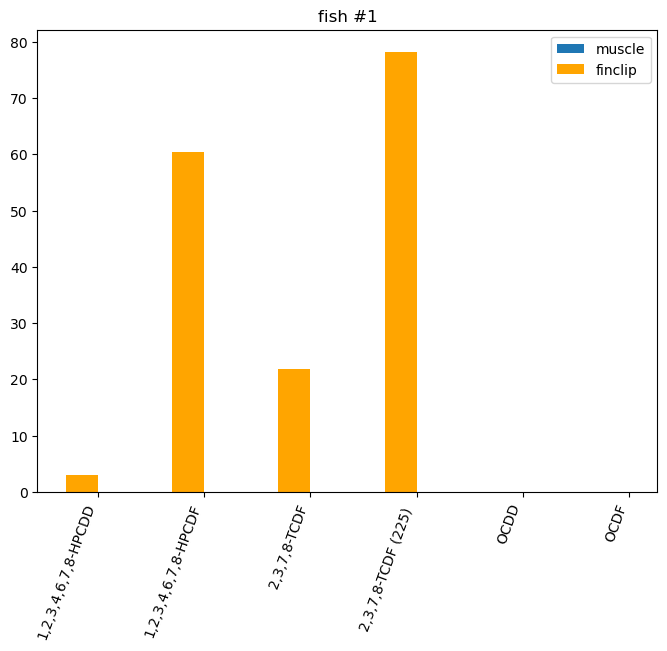

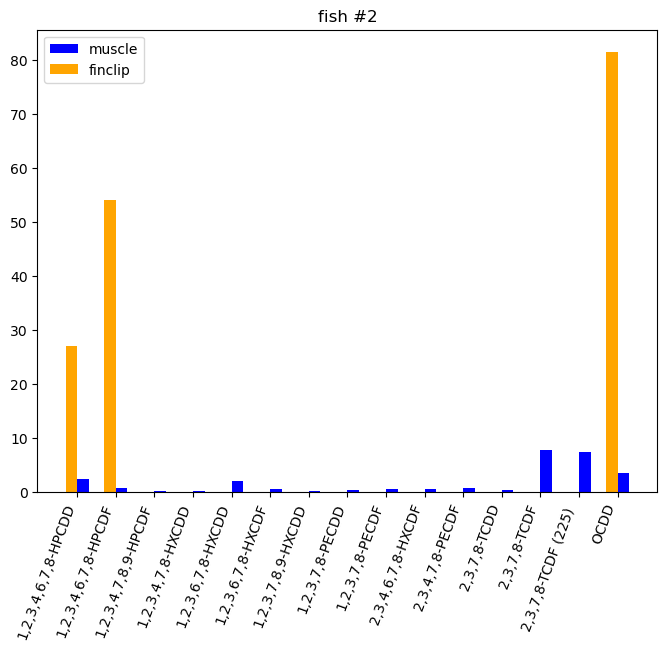

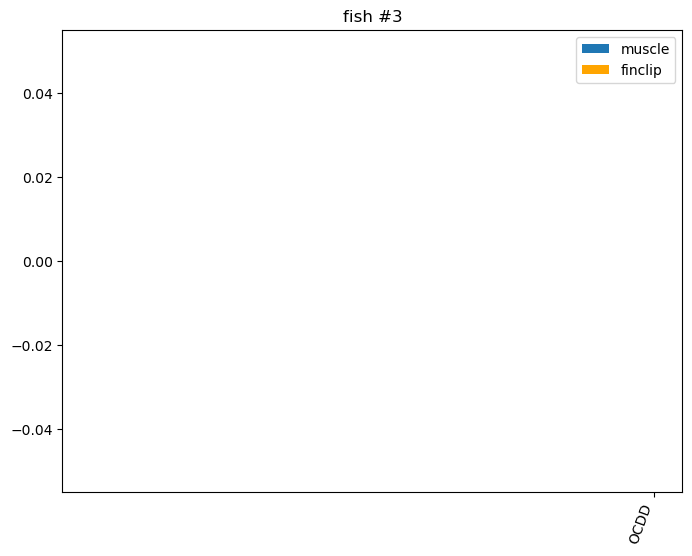

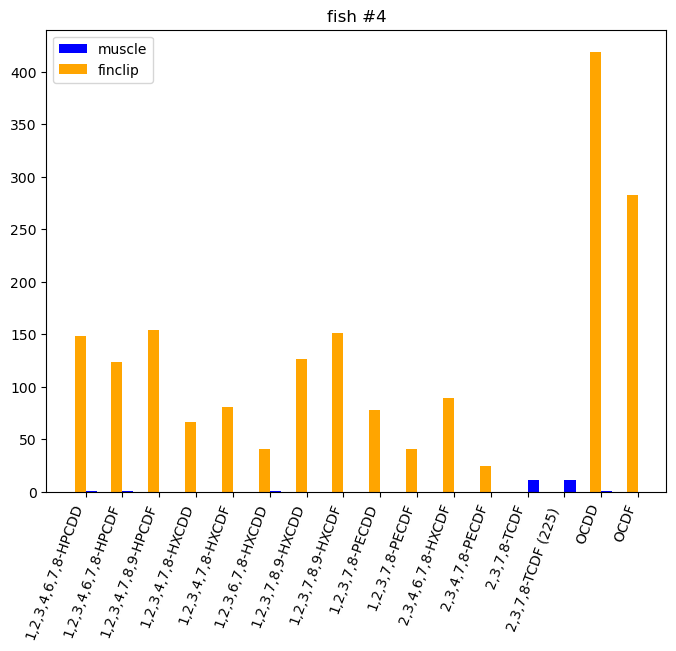

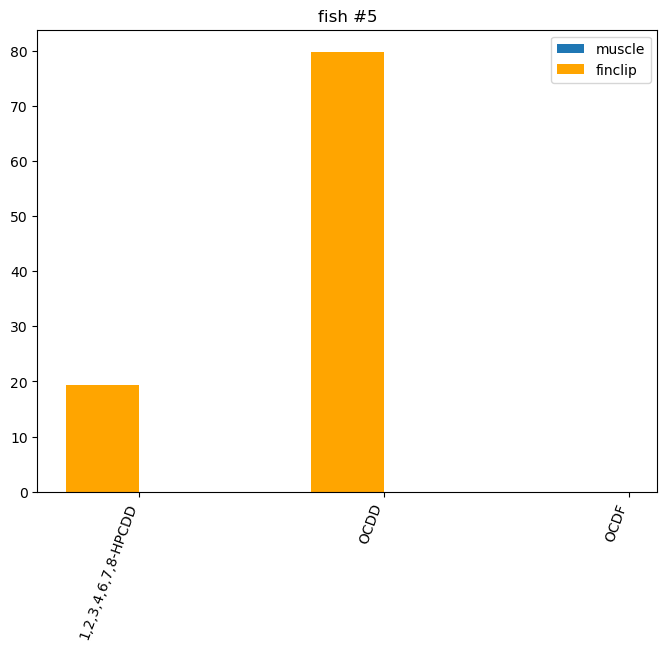

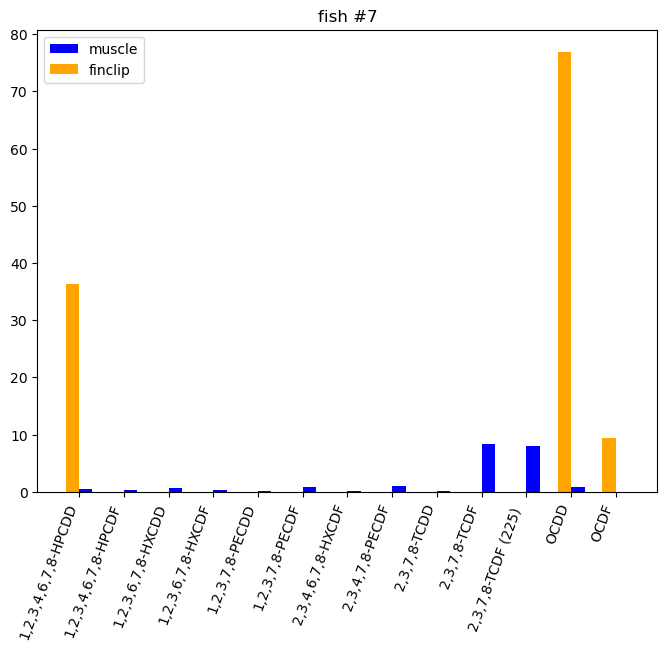

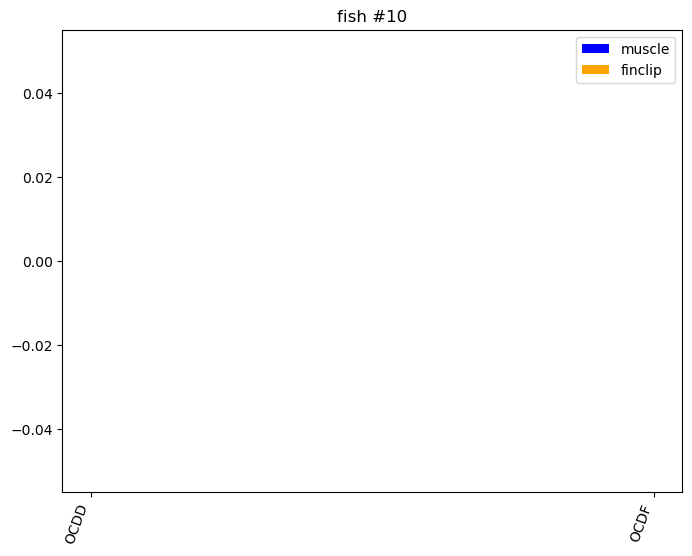

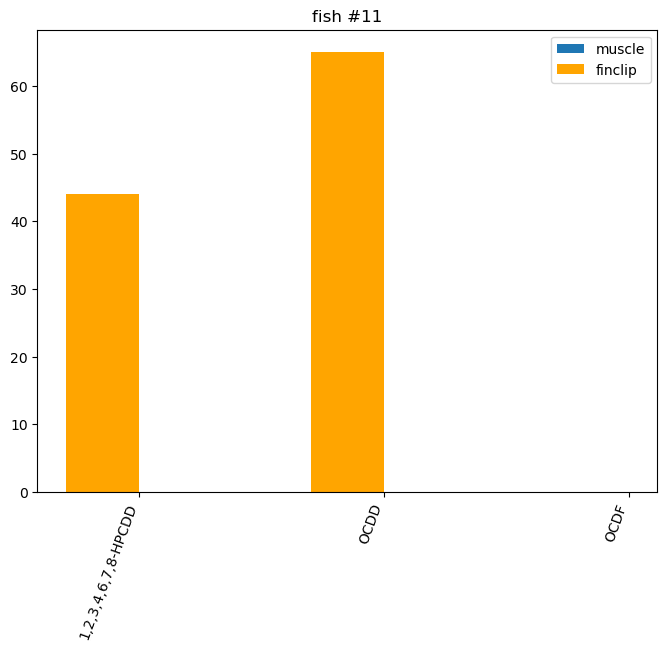

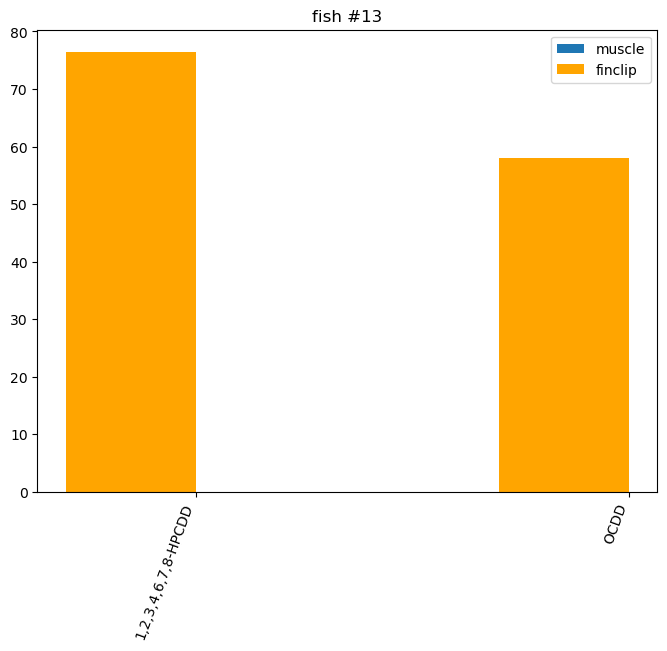

In [9]:
t = lipid_table
width = 0.3
for c in t.columns[2:]:
    plt.figure(facecolor='white', figsize = (8, 6))
    temp = t[c].dropna() #removing NANs
    # temp = temp.loc[temp != 0]
    temp = t.loc[temp.index, :]
    x = t.loc[temp.index, 'CLIENT_ID'].unique()
    xx = np.arange(x.shape[0])
    plt.xticks(xx, labels = x, rotation = 70, ha = 'right')
    muscle_id = [i in temp.loc[temp['tag'] == 'muscle', "CLIENT_ID"].to_list() for i in x]
    finclip_id = [i in temp.loc[temp['tag'] == 'finclip', "CLIENT_ID"].to_list() for i in x]
    plt.bar(xx[muscle_id] + width/2, temp.loc[temp.tag == 'muscle', c].to_numpy('float'), width = width, color = 'blue', label = 'muscle')
    plt.bar(xx[finclip_id] - width/2, temp.loc[temp.tag == 'finclip', c].to_numpy('float'), width = width, color = 'orange', label = 'finclip')
    plt.title(f'fish #{c}')
    plt.legend();

# PCBs vs Finclips

In [10]:
muscle = pd.read_excel('MusclePCB.xlsx', sheet_name= 'DATA')

rlnd = muscle.loc[muscle.iloc[:,-6] == "ND", muscle.columns[-4]].dropna() #reporting limits who are NDs
muscle.loc[rlnd.index, muscle.columns[-5]] = rlnd.to_numpy('float32')/np.sqrt(2) #reporting limts /sqrt(2) instead of ND in Blank column

c = muscle.columns[~muscle.columns.str.contains("unnamed", case = False)]

muscle = muscle.iloc[:, [0] + list(range(2,len(muscle.columns), 3))] #all needed columns, removing extras
muscle.columns = c.str.removeprefix("Nechako mort #")
muscle.drop(index = [0,1,2,3,4], inplace = True) #deleting first 4 rows
muscle.drop(columns = 'Spiked Matrix (102)', inplace = True) #deleting Spiked Matrix (102)

muscle.set_index('CLIENT_ID', inplace = True) #change client_id column to index, it is not column anymore, cuase we want to change it to float
muscle = muscle.astype("float") #all table is now float
muscle.reset_index(inplace = True)
muscle.insert(1,"tag", "muscle") 


#blank correction: 

muscle.loc[~muscle["Lab Blank (101)"].isna(), muscle.columns[2:-1]] -= muscle.loc[~muscle["Lab Blank (101)"].isna(), muscle.columns[-1]].to_numpy('float')[:,np.newaxis] #columnwise

#lipid normalization:

lipid= muscle.loc[muscle.CLIENT_ID.str.contains("lipid", case = False), :]
id = muscle.index.to_numpy() != lipid.index.to_numpy() 
muscle.loc[id,muscle.columns[2::]]/= muscle.loc[~id, muscle.columns[2::]].to_numpy('float')

#muscle.where((muscle.iloc[:, 2:]>0) | (muscle.iloc[:, 2:].isna()), 0, inplace = True) #change - to 0
muscle.iloc[:, 2::] = muscle.iloc[:,2::].where((muscle.iloc[:,2::]>0) | (muscle.iloc[:, 2::].isna()), 0) #change - to 0
muscle.drop(index = muscle.index[muscle.CLIENT_ID.str.contains('recovery', case = False)], inplace=True)
muscle.drop(index = muscle.index[muscle.CLIENT_ID.str.contains('WHO')], inplace=True)
muscle.drop(columns='Lab Blank (101)', inplace = True)
muscle


,CLIENT_ID,tag,2,4,7,10
0,PCB-1,muscle,0.089195,0.123301,0.042537,0.777027
1,PCB-2,muscle,0.051017,0.075534,0.019224,0.637838
2,PCB-3,muscle,0.070212,0.154757,0.045284,0.658108
3,PCB-4,muscle,0.074442,0.372199,0.056025,1.738956
4,PCB-5,muscle,0.020954,NaN,0.005657,NaN
...,...,...,...,...,...,...
166,Total Octachloro Biphenyls,muscle,145.762712,337.864078,91.044776,67.837838
167,Total Nonachloro Biphenyls,muscle,17.033898,41.553398,11.164179,7.986486
168,Decachloro Biphenyl,muscle,4.830508,8.097087,3.134328,NaN
169,TOTAL PCBs,muscle,4129.703390,8031.262136,3727.194030,2704.054054


In [11]:
finclip = pd.read_excel("./generated excels/pcb.xlsx", sheet_name="lipid_normalized")
finclip.rename(columns={finclip.columns[0]: 'CLIENT_ID'}, inplace=True)
finclip.columns = finclip.columns.str.removesuffix("-Trembleur")
finclip.insert(1, 'tag', 'finclip')
finclip.head()

,CLIENT_ID,tag,1,2,3,4,5,7,10,11,13
0,PCB-1,finclip,1505.882353,1329.629630,1198.750000,1715.131579,914.778325,792.307692,1322.222222,353.846154,1223.780488
1,PCB-2,finclip,602.941176,523.456790,346.666667,791.447368,393.103448,615.384615,595.555556,257.396450,825.000000
2,PCB-3,finclip,1188.235294,1170.370370,1165.833333,1400.000000,777.339901,1327.472527,1384.444444,436.686391,1328.048780
3,PCB-4,finclip,1050.000000,1154.320988,1485.416667,2042.763158,1460.591133,143.956044,244.444444,234.911243,411.585366
4,PCB-5,finclip,NaN,NaN,114.224997,102.723679,70.019701,NaN,NaN,NaN,NaN


In [12]:
pcb_table = pd.concat([finclip, muscle], axis = 0)
pcb_table.reset_index(drop=True, inplace=True)
pcb_table.head()

,CLIENT_ID,tag,1,2,3,4,5,7,10,11,13
0,PCB-1,finclip,1505.882353,1329.629630,1198.750000,1715.131579,914.778325,792.307692,1322.222222,353.846154,1223.780488
1,PCB-2,finclip,602.941176,523.456790,346.666667,791.447368,393.103448,615.384615,595.555556,257.396450,825.000000
2,PCB-3,finclip,1188.235294,1170.370370,1165.833333,1400.000000,777.339901,1327.472527,1384.444444,436.686391,1328.048780
3,PCB-4,finclip,1050.000000,1154.320988,1485.416667,2042.763158,1460.591133,143.956044,244.444444,234.911243,411.585366
4,PCB-5,finclip,NaN,NaN,114.224997,102.723679,70.019701,NaN,NaN,NaN,NaN


In [13]:
pcb_table.drop(index = pcb_table.index[pcb_table.CLIENT_ID.str.contains('Total', case = False)], inplace=True)
pcb_table.drop(index = pcb_table.index[pcb_table.CLIENT_ID.str.contains('Decachloro Biphenyl', case = False)], inplace=True)
pcb_table.drop(index = pcb_table.index[pcb_table.CLIENT_ID.str.contains('Lipid', case = False)], inplace = True)
pcb_table.head()

,CLIENT_ID,tag,1,2,3,4,5,7,10,11,13
0,PCB-1,finclip,1505.882353,1329.629630,1198.750000,1715.131579,914.778325,792.307692,1322.222222,353.846154,1223.780488
1,PCB-2,finclip,602.941176,523.456790,346.666667,791.447368,393.103448,615.384615,595.555556,257.396450,825.000000
2,PCB-3,finclip,1188.235294,1170.370370,1165.833333,1400.000000,777.339901,1327.472527,1384.444444,436.686391,1328.048780
3,PCB-4,finclip,1050.000000,1154.320988,1485.416667,2042.763158,1460.591133,143.956044,244.444444,234.911243,411.585366
4,PCB-5,finclip,NaN,NaN,114.224997,102.723679,70.019701,NaN,NaN,NaN,NaN


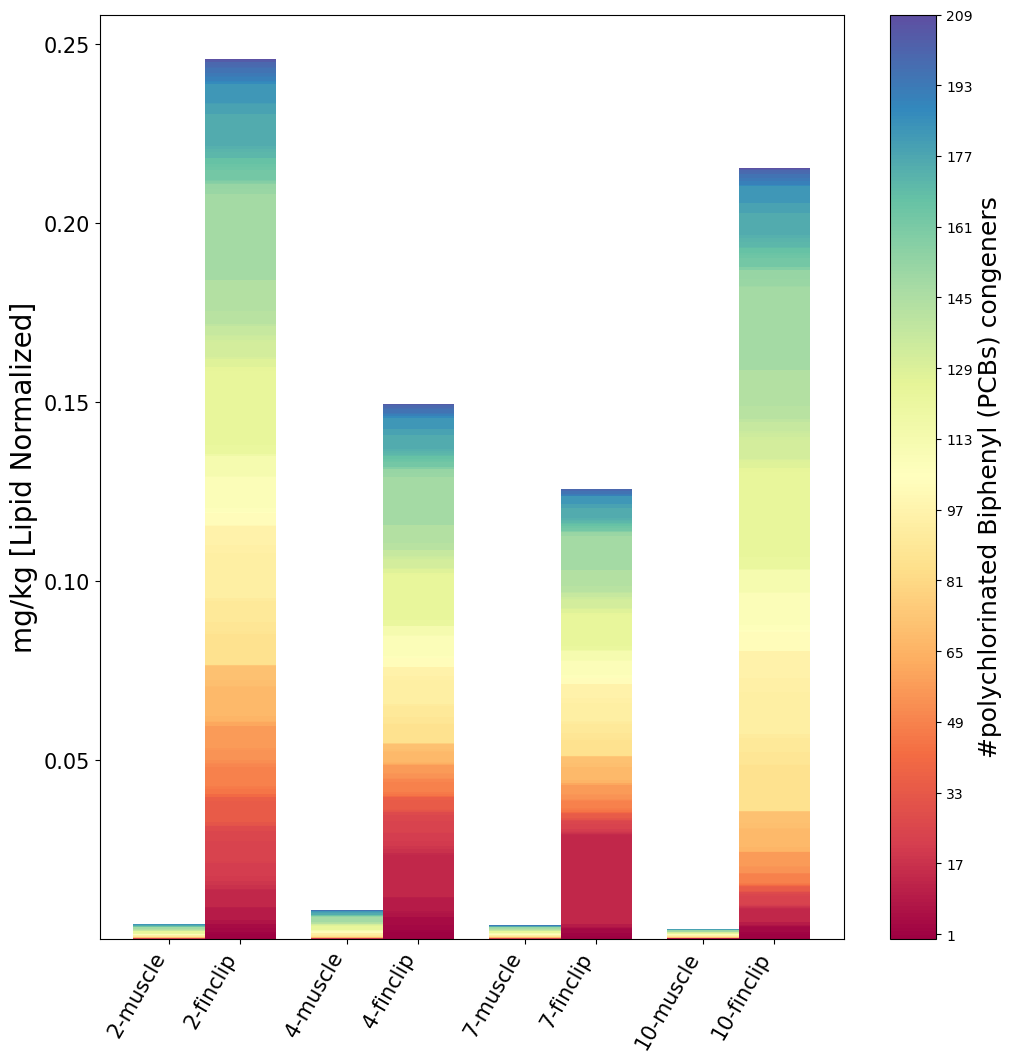

In [39]:
t = pcb_table.copy()

t = t.loc[:, t.loc[t.tag == 'muscle', :].sum(axis=0) != 0] # for removing the rest (without muscle)
x = np.arange(len(t.columns[2:]))*2
width = 0.8
bottom1 = 0
bottom2= 0
plt.figure(facecolor='white', figsize=(12, 12))
plt.xticks(np.r_[x+(width/2), x-(width/2)], np.r_[t.columns[2:]+"-finclip", t.columns[2:]+"-muscle"], rotation = 60, ha = 'right', fontsize = 15)
cmap = plt.get_cmap('Spectral')
z_c = len(t['CLIENT_ID'].unique())
for i, r in enumerate(t["CLIENT_ID"].unique()):
    color = cmap(i/z_c)
    temp = t.loc[(t.CLIENT_ID == r) & (t.tag == "muscle"), t.columns[2:]]
    y = temp.to_numpy("float")[0]/1000000
    plt.bar(x - (width/2),y, width=width, color = color, bottom = bottom1)
    y[np.isnan(y)] = 0
    bottom1 = bottom1 + y
    
    temp = t.loc[(t.CLIENT_ID == r) & (t.tag == "finclip"), temp.columns]
    y = temp.to_numpy("float")[0]/1000000
    plt.bar(x + width/2, y, width=width, label = f"{r}", color = color, bottom = bottom2)
    y[np.isnan(y)] = 0
    bottom2 = bottom2 + y
    
    #plt.title('polychlorinated Biphenyl (PCBs)', fontsize = 20)
    #plt.legend(bbox_to_anchor = (1, 1), ncol = 4)


sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=209))
sm.set_array([])  # Setting an empty array to the color bar
cbar = plt.colorbar(sm, ticks=np.arange(1, 210, 16))
cbar.set_label('#polychlorinated Biphenyl (PCBs) congeners', fontsize = 18)

plt.ylabel("mg/kg [Lipid Normalized]", fontsize = 20)
plt.yticks(fontsize = 15);




In [15]:
t
329/2


164.5